In [1]:
import numpy as np
import os
import random
import shutil
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage import affine_transform

# EDA

In [2]:
dataset_path = "data/dataset/"

In [3]:
class_labels = os.listdir(dataset_path)

class_counts = {} 
sample_images = {} 

for label in class_labels:
    class_path = os.path.join(dataset_path, label)
    
    images = os.listdir(class_path)
    
    class_counts[label] = len(images)
    
    random_image = random.choice(images)
    sample_images[label] = os.path.join(class_path, random_image)

In [4]:
total_images = sum(class_counts.values())
total_classes = len(class_labels)
print(f'Total images: {total_images}')
print(f'Total classes: {total_classes}')

Total images: 11910
Total classes: 15


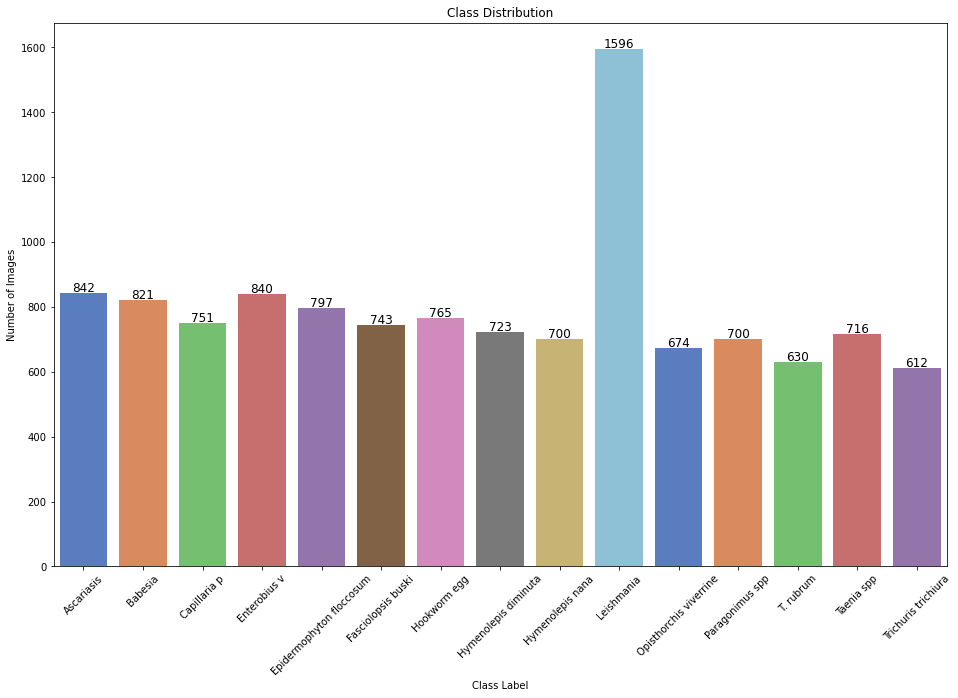

In [5]:
colors = sns.color_palette('muted')

plt.figure(figsize=(16, 10))
ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=colors)

for p, label in zip(ax.patches, class_counts.values()):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.savefig('images/Bar - Class Distribution.jpg', dpi=300, format='jpg')
plt.show()

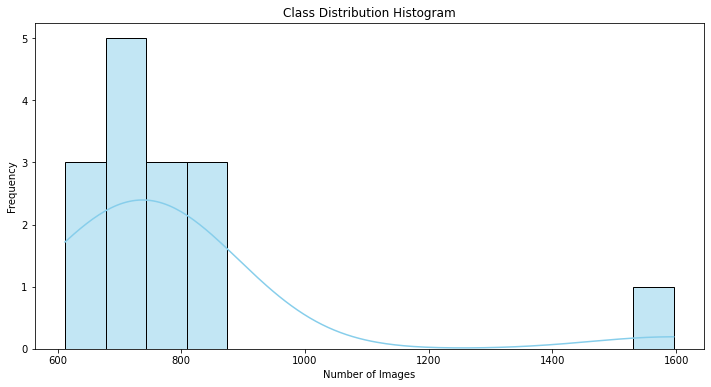

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(list(class_counts.values()), bins=15, kde=True, color='skyblue') 
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Class Distribution Histogram')
plt.savefig('images/Histogram - Class Distribution.jpg', dpi=300, format='jpg')
plt.show()

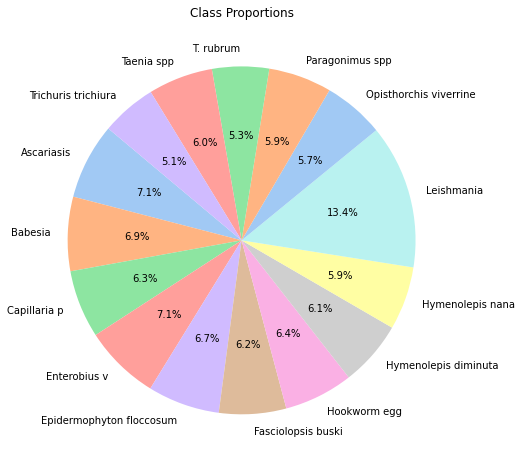

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Class Proportions')
plt.savefig('images/Pie - Class Proportions.jpg', dpi=300, format='jpg')
plt.show()

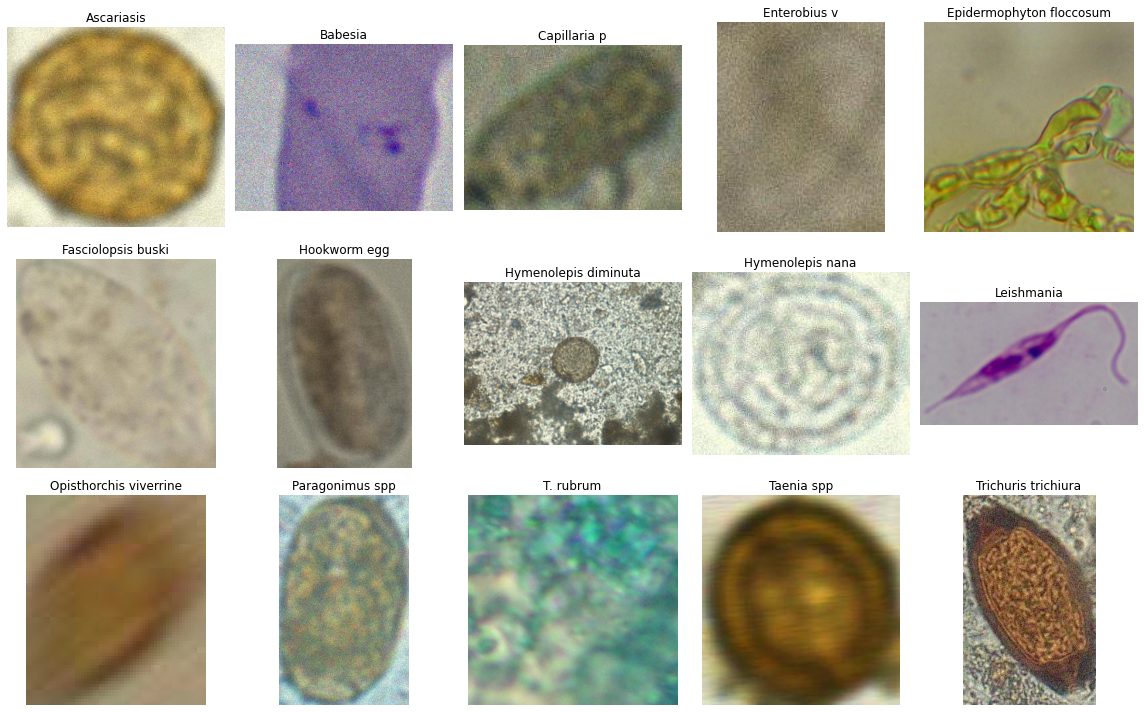

In [8]:
plt.figure(figsize=(16, 10))
for i, (label, image_path) in enumerate(sample_images.items()):
    plt.subplot(3, 5, i + 1)
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.savefig('images/Parasite Samples.jpg', dpi=300, format='jpg')
plt.show()

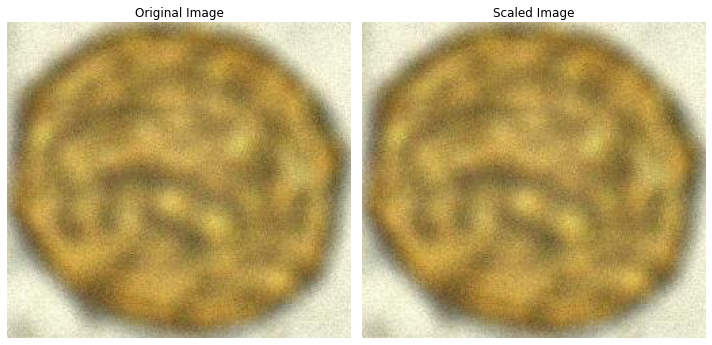

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

img = plt.imread(sample_images["Ascariasis"])

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0])
ax1.imshow(img)
ax1.set_title("Original Image")
ax1.axis("off")

scaled_img = img / 255.0 
ax2 = plt.subplot(gs[1])
ax2.imshow(scaled_img)
ax2.set_title("Scaled Image")
ax2.axis("off")

plt.tight_layout()
plt.savefig('images/Scaled Example.jpg', dpi=300, format='jpg')
plt.show()


[0.51372549 0.41568627 0.20392157]


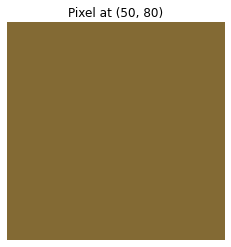

In [51]:
import matplotlib.pyplot as plt

x, y = 50, 80 

pixel_color = scaled_img[y, x]

print(pixel_color)
plt.figure(figsize=(4, 4))
plt.imshow([[pixel_color]])
plt.title(f"Pixel at ({x}, {y})")
plt.axis('off')
plt.show()


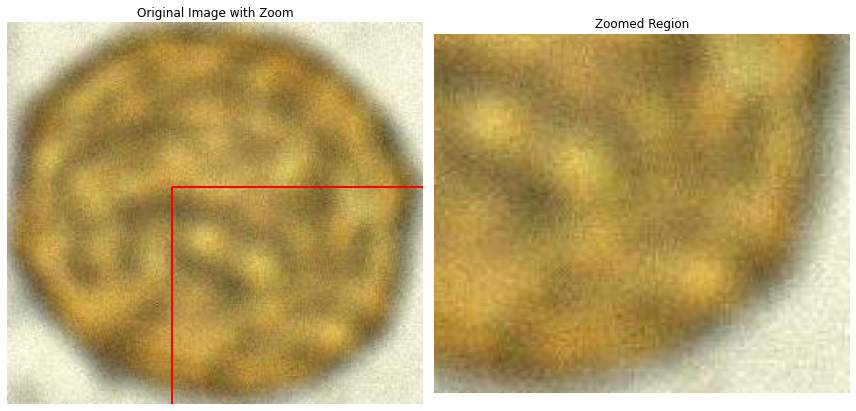

In [28]:
zoom_x, zoom_y, zoom_width, zoom_height = 100, 100, 200, 200

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0])
ax1.imshow(img)
ax1.set_title("Original Image with Zoom")
ax1.axis("off")
ax1.add_patch(plt.Rectangle((zoom_x, zoom_y), zoom_width, zoom_height, fill=False, edgecolor='red', linewidth=2))

zoomed_region = img[zoom_y:zoom_y+zoom_height, zoom_x:zoom_x+zoom_width]

ax2 = plt.subplot(gs[1])
ax2.imshow(scaled_zoomed_region)
ax2.set_title("Zoomed Region")
ax2.axis("off")

plt.tight_layout()
plt.savefig('images/Zoomed Example.jpg', dpi=300, format='jpg')
plt.show()


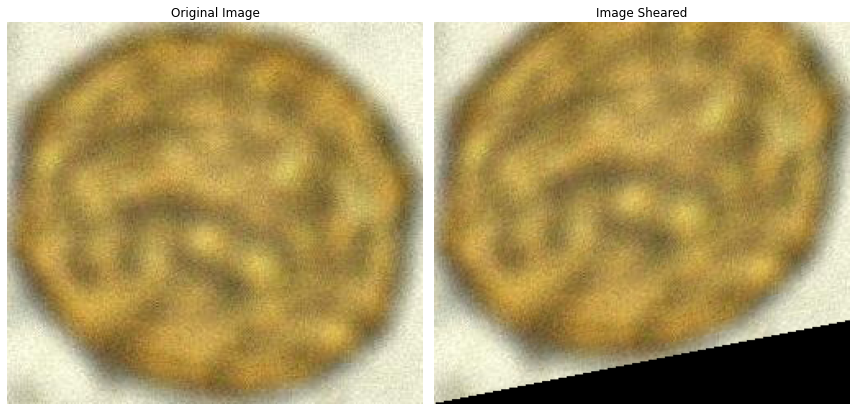

In [35]:
zoom_x, zoom_y, zoom_width, zoom_height = 100, 100, 200, 200
shear_factor = 0.2  
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0])
ax1.imshow(img)
ax1.set_title("Original Image")
ax1.axis("off")

shear_matrix = np.array([[1, shear_factor, 0],
                         [0, 1, 0],
                         [0, 0, 1]])

sheared_zoomed_region = affine_transform(img, shear_matrix)

ax2 = plt.subplot(gs[1])
ax2.imshow(sheared_zoomed_region)
ax2.set_title("Image Sheared")
ax2.axis("off")

plt.tight_layout()
plt.savefig('images/Sheared Example.jpg', dpi=300, format='jpg')
plt.show()


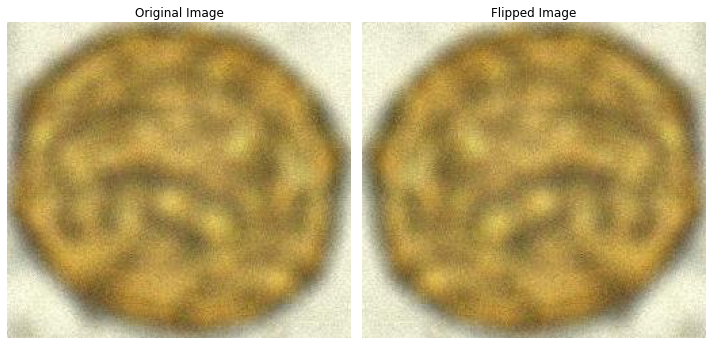

In [38]:
flipped_img = cv2.flip(img, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_img)
plt.title("Flipped Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('images/Horizontal Flipped Example.jpg', dpi=300, format='jpg')

plt.show()

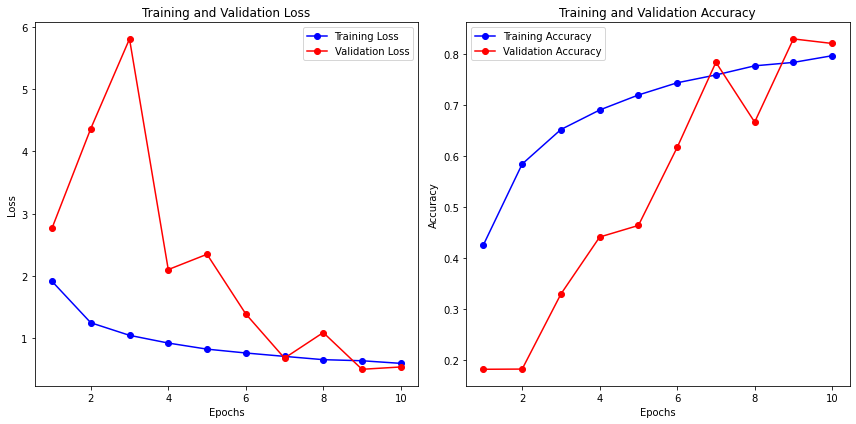

In [10]:
epochs = range(1, 11)
train_loss = [1.9140, 1.2486, 1.0463, 0.9223, 0.8246, 0.7627, 0.7083, 0.6554, 0.6380, 0.5961]
val_loss = [2.7678, 4.3666, 5.8075, 2.1025, 2.3482, 1.3904, 0.6803, 1.0908, 0.5010, 0.5381]
train_accuracy = [0.4263, 0.5846, 0.6522, 0.6904, 0.7198, 0.7437, 0.7590, 0.7769, 0.7836, 0.7967]
val_accuracy = [0.1826, 0.1830, 0.3300, 0.4416, 0.4643, 0.6171, 0.7838, 0.6667, 0.8296, 0.8207]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('images/First Model Evaluation.jpg', dpi=300, format='jpg')
plt.show()


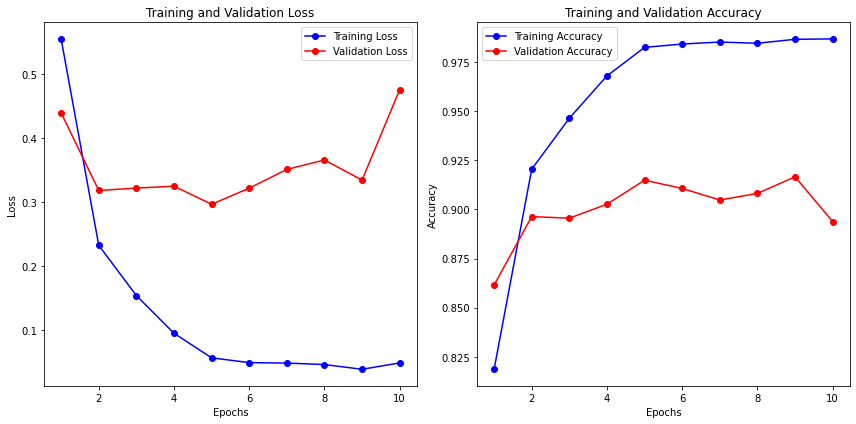

In [11]:
epochs = range(1, 11)
train_loss = [0.5553, 0.2328, 0.1543, 0.0954, 0.0570, 0.0495, 0.0488, 0.0465, 0.0391, 0.0490]
val_loss = [0.4398, 0.3185, 0.3222, 0.3252, 0.2969, 0.3221, 0.3514, 0.3661, 0.3347, 0.4760]
train_accuracy = [0.8187, 0.9204, 0.9463, 0.9678, 0.9823, 0.9840, 0.9850, 0.9844, 0.9864, 0.9866]
val_accuracy = [0.8615, 0.8963, 0.8955, 0.9026, 0.9148, 0.9106, 0.9047, 0.9081, 0.9165, 0.8938]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('images/First ResNet Evaluation.jpg', dpi=300, format='jpg')
plt.show()


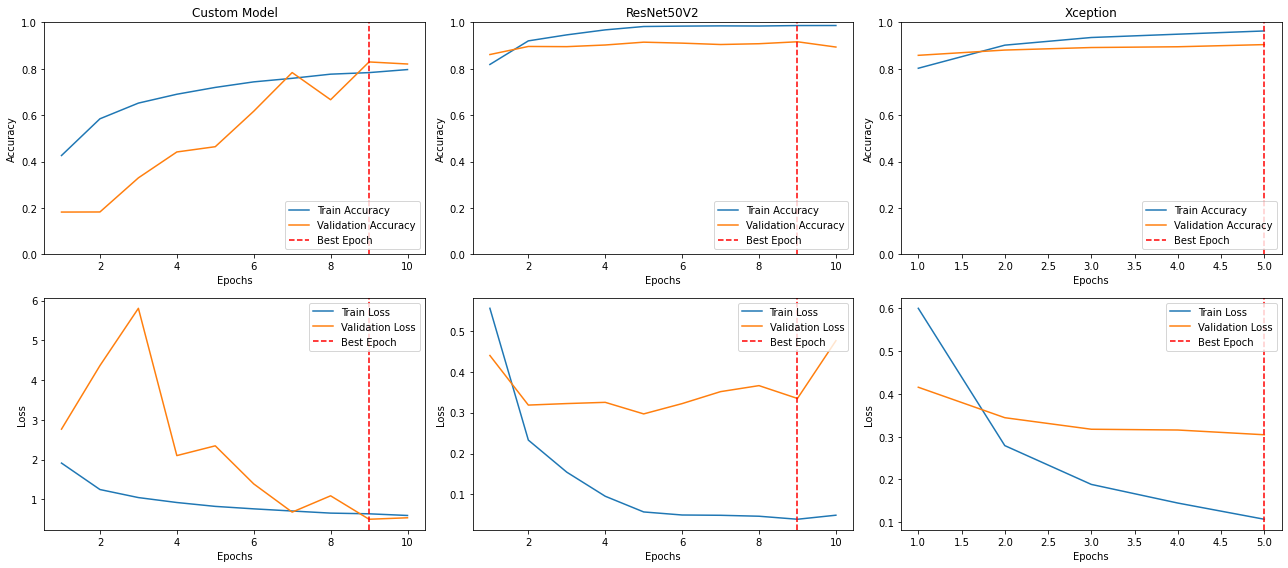

In [64]:
custom_model_train_accuracy = [0.4263, 0.5846, 0.6522, 0.6904, 0.7198, 0.7437, 0.7590, 0.7769, 0.7836, 0.7967]
custom_model_val_accuracy = [0.1826, 0.1830, 0.3300, 0.4416, 0.4643, 0.6171, 0.7838, 0.6667, 0.8296, 0.8207]
custom_model_train_loss = [1.9140, 1.2486, 1.0463, 0.9223, 0.8246, 0.7627, 0.7083, 0.6554, 0.6380, 0.5961]
custom_model_val_loss = [2.7678, 4.3666, 5.8075, 2.1025, 2.3482, 1.3904, 0.6803, 1.0908, 0.5010, 0.5381]

resnet50v2_train_accuracy = [0.8187, 0.9204, 0.9463, 0.9678, 0.9823, 0.9840, 0.9850, 0.9844, 0.9864, 0.9866]
resnet50v2_val_accuracy = [0.8615, 0.8963, 0.8955, 0.9026, 0.9148, 0.9106, 0.9047, 0.9081, 0.9165, 0.8938]
resnet50v2_train_loss = [0.5553, 0.2328, 0.1543, 0.0954, 0.0570, 0.0495, 0.0488, 0.0465, 0.0391, 0.0490]
resnet50v2_val_loss = [0.4398, 0.3185, 0.3222, 0.3252, 0.2969, 0.3221, 0.3514, 0.3661, 0.3347, 0.4760]

xception_train_accuracy = [0.8024, 0.9019, 0.9349, 0.9492, 0.9631]
xception_val_accuracy = [0.8581, 0.8808, 0.8917, 0.8950, 0.9043]
xception_train_loss = [0.6003, 0.2792, 0.1885, 0.1449, 0.1070]
xception_val_loss = [0.4157, 0.3445, 0.3175, 0.3157, 0.3046]

custom_model_best_epoch = custom_model_val_accuracy.index(max(custom_model_val_accuracy))
resnet50v2_best_epoch = resnet50v2_val_accuracy.index(max(resnet50v2_val_accuracy))
xception_best_epoch = xception_val_accuracy.index(max(xception_val_accuracy))

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Custom Model
axs[0, 0].plot(range(1, 11), custom_model_train_accuracy, label='Train Accuracy')
axs[0, 0].plot(range(1, 11), custom_model_val_accuracy, label='Validation Accuracy')
axs[0, 0].set_title('Custom Model')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].set_ylim([0, 1])
axs[0, 0].axvline(x=custom_model_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[0, 0].legend(loc='lower right')

axs[1, 0].plot(range(1, 11), custom_model_train_loss, label='Train Loss')
axs[1, 0].plot(range(1, 11), custom_model_val_loss, label='Validation Loss')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()
axs[1, 0].axvline(x=custom_model_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[1, 0].legend(loc='upper right')

# ResNet50V2
axs[0, 1].plot(range(1, 11), resnet50v2_train_accuracy, label='Train Accuracy')
axs[0, 1].plot(range(1, 11), resnet50v2_val_accuracy, label='Validation Accuracy')
axs[0, 1].set_title('ResNet50V2')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].set_ylim([0, 1])
axs[0, 1].axvline(x=resnet50v2_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[0, 1].legend(loc='lower right')

axs[1, 1].plot(range(1, 11), resnet50v2_train_loss, label='Train Loss')
axs[1, 1].plot(range(1, 11), resnet50v2_val_loss, label='Validation Loss')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()
axs[1, 1].axvline(x=resnet50v2_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[1, 1].legend(loc='upper right')

# Xception
axs[0, 2].plot(range(1, 6), xception_train_accuracy, label='Train Accuracy')
axs[0, 2].plot(range(1, 6), xception_val_accuracy, label='Validation Accuracy')
axs[0, 2].set_title('Xception')
axs[0, 2].set_xlabel('Epochs')
axs[0, 2].set_ylabel('Accuracy')
axs[0, 2].legend()
axs[0, 2].set_ylim([0, 1])
axs[0, 2].axvline(x=xception_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[0, 2].legend(loc='lower right')

axs[1, 2].plot(range(1, 6), xception_train_loss, label='Train Loss')
axs[1, 2].plot(range(1, 6), xception_val_loss, label='Validation Loss')
axs[1, 2].set_xlabel('Epochs')
axs[1, 2].set_ylabel('Loss')
axs[1, 2].legend()
axs[1, 2].axvline(x=xception_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[1, 2].legend(loc='upper right')

plt.tight_layout()
plt.savefig('images/Training Evaluation.jpg', dpi=300, format='jpg')
plt.show()

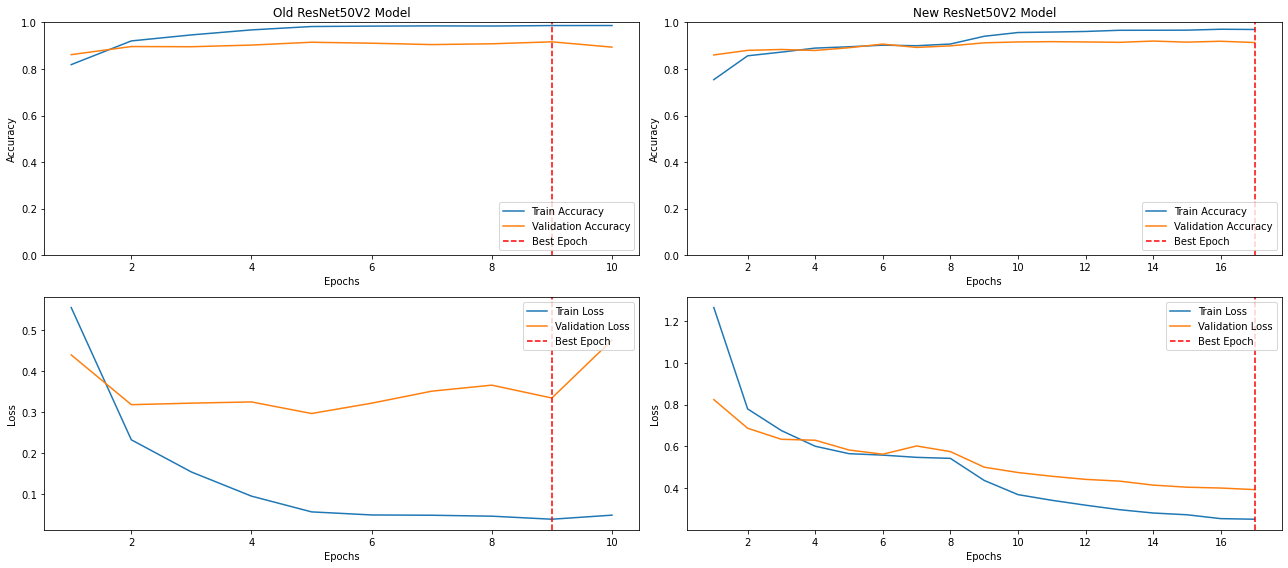

In [67]:
old_resnet50v2_train_accuracy = [0.8187, 0.9204, 0.9463, 0.9678, 0.9823, 0.9840, 0.9850, 0.9844, 0.9864, 0.9866]
old_resnet50v2_val_accuracy = [0.8615, 0.8963, 0.8955, 0.9026, 0.9148, 0.9106, 0.9047, 0.9081, 0.9165, 0.8938]
old_resnet50v2_train_loss = [0.5553, 0.2328, 0.1543, 0.0954, 0.0570, 0.0495, 0.0488, 0.0465, 0.0391, 0.0490]
old_resnet50v2_val_loss = [0.4398, 0.3185, 0.3222, 0.3252, 0.2969, 0.3221, 0.3514, 0.3661, 0.3347, 0.4760]

old_resnet50v2_best_epoch = old_resnet50v2_val_accuracy.index(max(old_resnet50v2_val_accuracy))

fig, axs = plt.subplots(2, 2, figsize=(18, 8))

# Old ResNet50V2 Model
axs[0, 0].plot(range(1, 11), old_resnet50v2_train_accuracy, label='Train Accuracy')
axs[0, 0].plot(range(1, 11), old_resnet50v2_val_accuracy, label='Validation Accuracy')
axs[0, 0].set_title('Old ResNet50V2 Model')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()
axs[0, 0].set_ylim([0, 1])
axs[0, 0].axvline(x=old_resnet50v2_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[0, 0].legend(loc='lower right')

axs[1, 0].plot(range(1, 11), old_resnet50v2_train_loss, label='Train Loss')
axs[1, 0].plot(range(1, 11), old_resnet50v2_val_loss, label='Validation Loss')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()
axs[1, 0].axvline(x=old_resnet50v2_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[1, 0].legend(loc='upper right')

# New ResNet50V2 Model
new_resnet50v2_train_accuracy = [0.7541, 0.8565, 0.8724, 0.8896, 0.8953, 0.9022, 0.8998, 0.9071, 0.9404, 0.9565,
                                0.9585, 0.9611, 0.9661, 0.9663, 0.9667, 0.9706, 0.9696]
new_resnet50v2_val_accuracy = [0.8602, 0.8799, 0.8837, 0.8795, 0.8913, 0.9068, 0.8925, 0.8992, 0.9123, 0.9160,
                              0.9173, 0.9160, 0.9144, 0.9198, 0.9152, 0.9190, 0.9135]
new_resnet50v2_train_loss = [1.2652, 0.7797, 0.6759, 0.6009, 0.5653, 0.5584, 0.5477, 0.5428, 0.4371, 0.3691,
                            0.3420, 0.3185, 0.2970, 0.2810, 0.2726, 0.2541, 0.2513]
new_resnet50v2_val_loss = [0.8242, 0.6872, 0.6341, 0.6297, 0.5828, 0.5628, 0.6022, 0.5752, 0.5006, 0.4750,
                          0.4571, 0.4422, 0.4338, 0.4147, 0.4047, 0.4007, 0.3932]

new_resnet50v2_best_epoch = 16

axs[0, 1].plot(range(1, 18), new_resnet50v2_train_accuracy, label='Train Accuracy')
axs[0, 1].plot(range(1, 18), new_resnet50v2_val_accuracy, label='Validation Accuracy')
axs[0, 1].set_title('New ResNet50V2 Model')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].set_ylim([0, 1])
axs[0, 1].axvline(x=new_resnet50v2_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[0, 1].legend(loc='lower right')

axs[1, 1].plot(range(1, 18), new_resnet50v2_train_loss, label='Train Loss')
axs[1, 1].plot(range(1, 18), new_resnet50v2_val_loss, label='Validation Loss')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()
axs[1, 1].axvline(x=new_resnet50v2_best_epoch + 1, color='r', linestyle='--', label='Best Epoch')
axs[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('images/ResNet50V2 Training Evaluation.jpg', dpi=300, format='jpg')
plt.show()


# Applying Filters

In [24]:
images = []
labels = []

class_labels = sorted(os.listdir(dataset_path))

num_images_per_label = 5

common_image_size = (224, 224)

for label in class_labels:
    label_dir = os.path.join(dataset_path, label)
    
    image_files = os.listdir(label_dir)
    
    selected_image_files = random.sample(image_files, num_images_per_label)
    
    for image_file in selected_image_files:
        image_path = os.path.join(label_dir, image_file)
        
        image = cv2.imread(image_path)
        image = cv2.resize(image, common_image_size)
        
        images.append(image)
        
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

images, labels = shuffle(images, labels, random_state=42)

In [4]:
images.shape

(75, 224, 224, 3)

In [5]:
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

    if nrows > 1 and ncols > 1:
        axes = axes.ravel()

    for i in range(nrows * ncols):
        ax = axes[i]
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(labels[i])

    plt.tight_layout()
    plt.show()

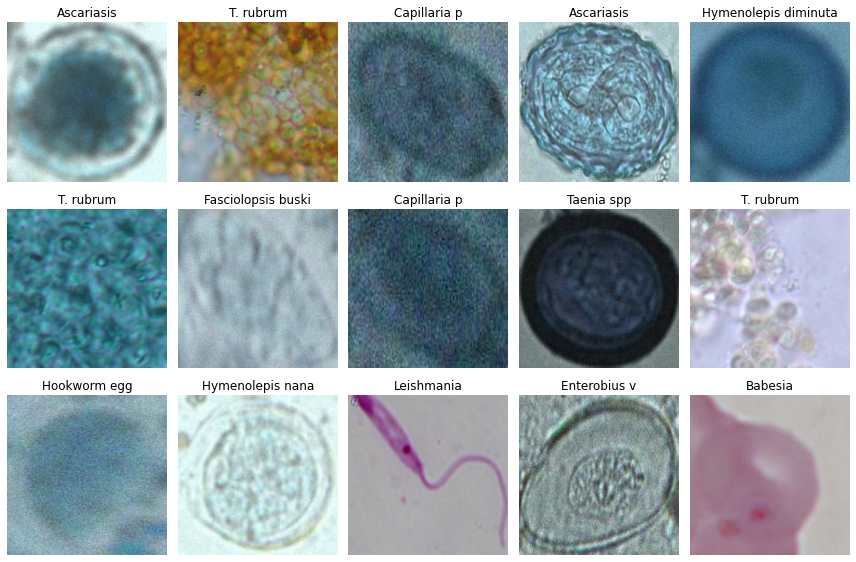

In [6]:
plot_images(images, labels, nrows=3, ncols=5)

In [8]:
weight_images = []

for img in images[:15]:
    weight_image = cv2.addWeighted(img, 1.3, np.zeros(img.shape, img.dtype), 0, 0)
    weight_images.append(weight_image)

weight_images = np.array(weight_images)

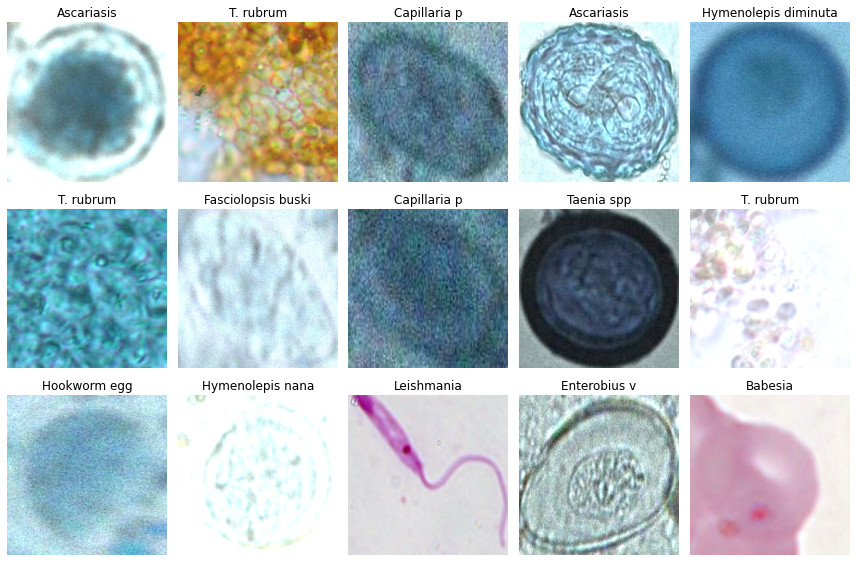

In [9]:
plot_images(weight_images, labels, nrows=3, ncols=5)

In [12]:
images.shape

(75, 224, 224, 3)

In [14]:
image_all=[]
for img in images:
    image_all.append(img)
    # Adaptive Thresholding..
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    image_all.append(thresh1)

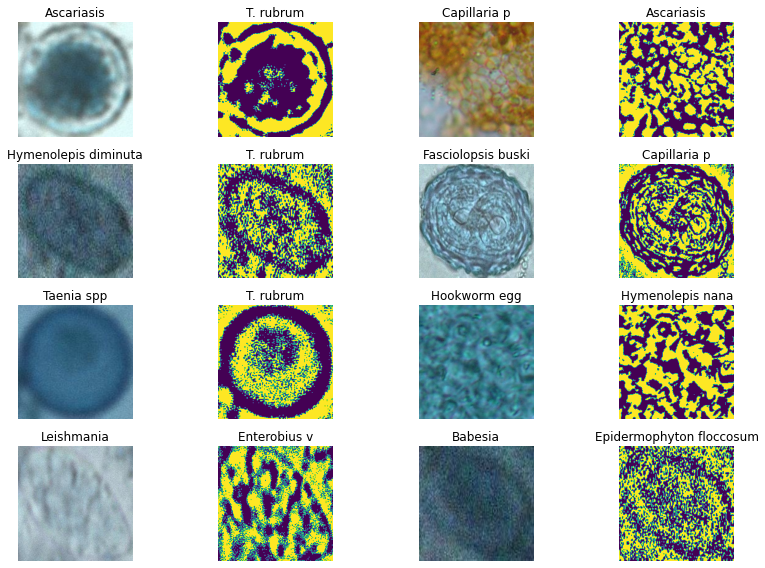

In [15]:
plot_images(image_all[:24], labels, nrows=4, ncols=4)

In [16]:
images_gray=[]
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    images_gray.append(gray)

In [23]:
images[0].shape

(224, 224)

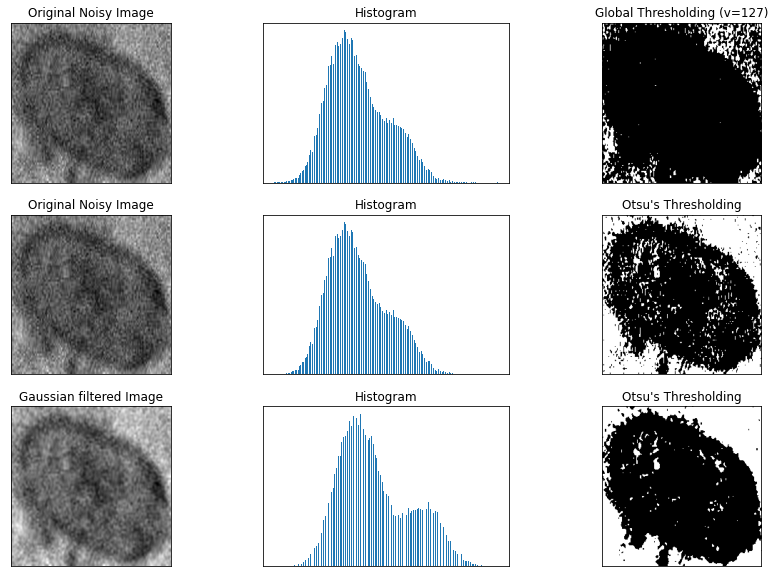

In [20]:
img = images_gray[2]
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
image_all = []
img = images[0]
image_all.append(img)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
# plt.imshow(img2)
# plt.show()
image_all.append(img2)


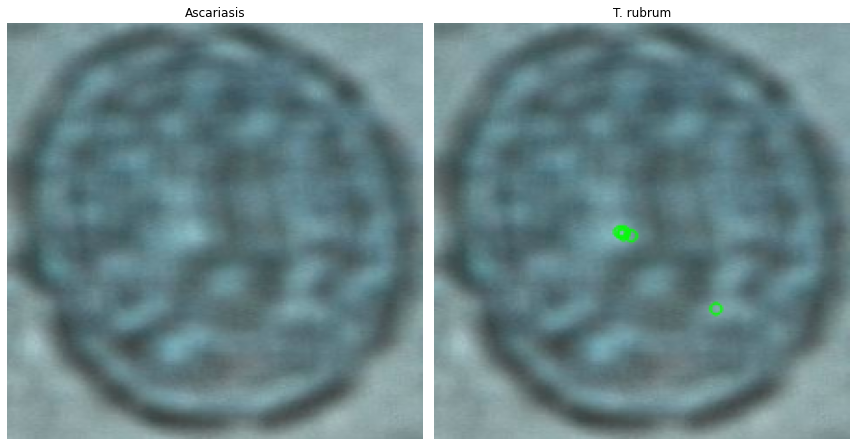

In [26]:
plot_images(image_all, labels, nrows=1, ncols=2)

In [27]:
image_all=[]
for img in images[:16]:
    img_neg = 1 - img
    image_all.append(img_neg)

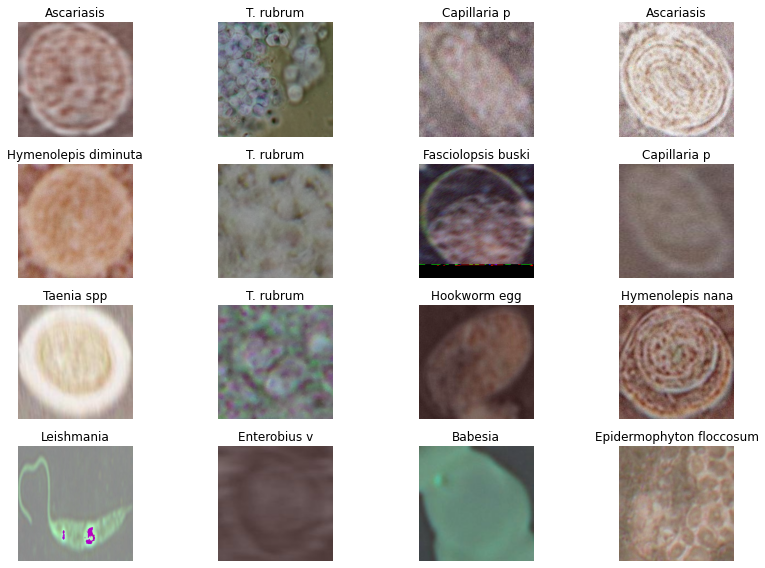

In [28]:
plot_images(image_all, labels, nrows=4, ncols=4)

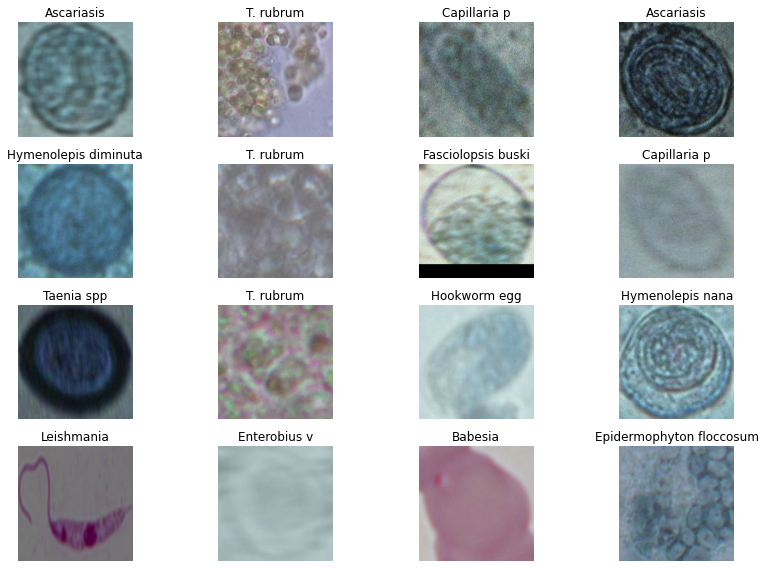

In [29]:
plot_images(images, labels, nrows=4, ncols=4)

In [30]:
image_all=[]
for img in images[:5]:
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 1)
    image_all.append(erosion)

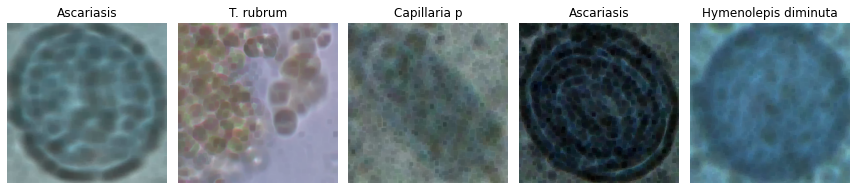

In [31]:
plot_images(image_all, labels, nrows=1, ncols=5)

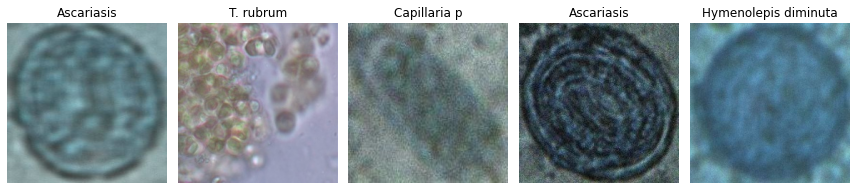

In [32]:
plot_images(images, labels, nrows=1, ncols=5)

In [33]:
image_all=[]
for img in images[:5]:
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(img,kernel,iterations = 1)
    image_all.append(dilation)

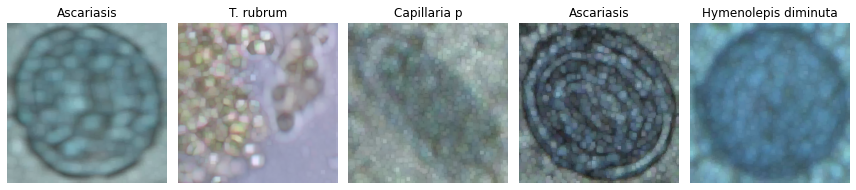

In [34]:
plot_images(image_all, labels, nrows=1, ncols=5)

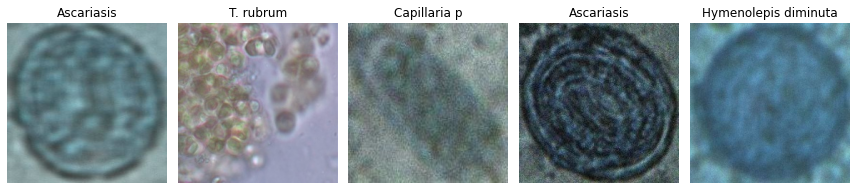

In [35]:
plot_images(images, labels, nrows=1, ncols=5)

In [36]:
image_all=[]
for img in images:
    kernel = np.ones((5,5),np.uint8)
    gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    image_all.append(gradient)

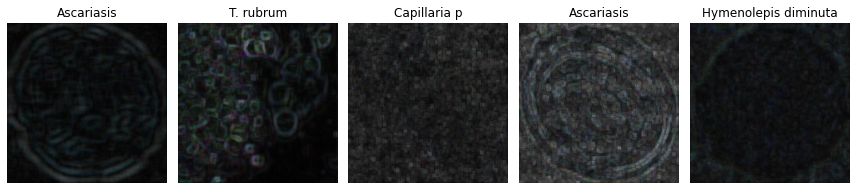

In [37]:
plot_images(image_all, labels, nrows=1, ncols=5)

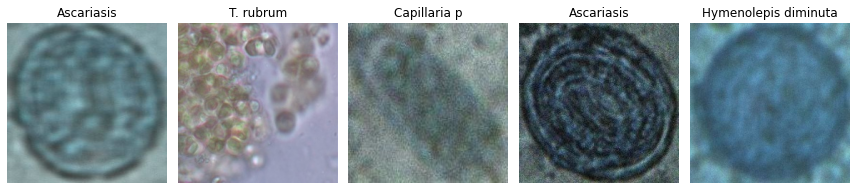

In [38]:
plot_images(images, labels, nrows=1, ncols=5)